<a href="https://colab.research.google.com/github/Akhil66624/Edge-Detection-CNN-VGG16-and-Holistically-Nested-Edge-Detection/blob/main/Edge_Detection_CNN_VGG16_Holistically_Nested_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!unzip BSDS500.zip -d BSDS500

Archive:  BSDS500.zip
   creating: BSDS500/BSDS500/
   creating: BSDS500/BSDS500/BSDS500_first_annotation_04/
   creating: BSDS500/BSDS500/BSDS500_first_annotation_04/val/
  inflating: BSDS500/BSDS500/BSDS500_first_annotation_04/val/196073.png  
  inflating: BSDS500/BSDS500/BSDS500_first_annotation_04/val/157055.png  
  inflating: BSDS500/BSDS500/BSDS500_first_annotation_04/val/130026.png  
  inflating: BSDS500/BSDS500/BSDS500_first_annotation_04/val/241048.png  
  inflating: BSDS500/BSDS500/BSDS500_first_annotation_04/val/376043.png  
  inflating: BSDS500/BSDS500/BSDS500_first_annotation_04/val/89072.png  
  inflating: BSDS500/BSDS500/BSDS500_first_annotation_04/val/253027.png  
  inflating: BSDS500/BSDS500/BSDS500_first_annotation_04/val/103070.png  
  inflating: BSDS500/BSDS500/BSDS500_first_annotation_04/val/101085.png  
  inflating: BSDS500/BSDS500/BSDS500_first_annotation_04/val/86000.png  
  inflating: BSDS500/BSDS500/BSDS500_first_annotation_04/val/78004.png  
  inflating: BSDS

In [ ]:
!zip -r BSDS500_01.zip /content/BSDS500

  adding: content/BSDS500/ (stored 0%)
  adding: content/BSDS500/BSDS500_first_annotation_04/ (stored 0%)
  adding: content/BSDS500/BSDS500_first_annotation_04/val/ (stored 0%)
  adding: content/BSDS500/BSDS500_first_annotation_04/val/196073.png (deflated 28%)
  adding: content/BSDS500/BSDS500_first_annotation_04/val/157055.png (deflated 36%)
  adding: content/BSDS500/BSDS500_first_annotation_04/val/130026.png (deflated 13%)
  adding: content/BSDS500/BSDS500_first_annotation_04/val/241048.png (deflated 8%)
  adding: content/BSDS500/BSDS500_first_annotation_04/val/376043.png (deflated 22%)
  adding: content/BSDS500/BSDS500_first_annotation_04/val/89072.png (deflated 17%)
  adding: content/BSDS500/BSDS500_first_annotation_04/val/253027.png (deflated 28%)
  adding: content/BSDS500/BSDS500_first_annotation_04/val/103070.png (deflated 20%)
  adding: content/BSDS500/BSDS500_first_annotation_04/val/101085.png (deflated 28%)
  adding: content/BSDS500/BSDS500_first_annotation_04/val/86000.png (

In [ ]:
#  Convert .mat Files to PNGs with Only the First Annotation]
!apt-get install -y libgl1-mesa-glx

import os
import scipy.io as sio
import numpy as np
import cv2

def convert_mat_to_png_first_annotation(folder_paths, output_base_dir, variable_name='groundTruth'):
    for folder_path in folder_paths:
        if not os.path.exists(folder_path):
            print(f"Folder '{folder_path}' does not exist. Skipping.")
            continue

        # Create an output folder mirroring the input folder's name.
        output_folder = os.path.join(output_base_dir, os.path.basename(folder_path))
        os.makedirs(output_folder, exist_ok=True)

        for mat_file in os.listdir(folder_path):
            if not mat_file.endswith('.mat'):
                continue

            mat_file_path = os.path.join(folder_path, mat_file)
            try:
                mat_data = sio.loadmat(mat_file_path)
            except Exception as e:
                print(f"Error loading {mat_file_path}: {e}")
                continue

            if variable_name not in mat_data:
                print(f"Variable '{variable_name}' not found in {mat_file_path}.")
                continue

            gt_data = mat_data[variable_name]
            try:

                if isinstance(gt_data, np.ndarray) and gt_data.size > 0:
                    gt_data_squeezed = gt_data.squeeze()
                    gt_first = gt_data_squeezed[4] if gt_data_squeezed.ndim > 0 else gt_data_squeezed
                else:
                    gt_first = gt_data


                if isinstance(gt_first, np.ndarray) and gt_first.dtype.names and 'Boundaries' in gt_first.dtype.names:
                    boundaries = gt_first['Boundaries'][0, 0]
                elif isinstance(gt_first, dict):
                    boundaries = gt_first.get('Boundaries', gt_first)
                else:
                    boundaries = gt_first

                edge_image = (boundaries * 255).astype(np.uint8)
            except Exception as e:
                print(f"Error processing first annotation in {mat_file_path}: {e}")
                continue

            # Use the original .mat filename (without extension) for the output PNG.
            base_name = os.path.splitext(mat_file)[0]
            out_filename = os.path.join(output_folder, f"{base_name}.png")
            cv2.imwrite(out_filename, edge_image)
            print(f"Saved {out_filename}")

# Specify the paths for the train, val, and test folders
folder_paths = ['./BSDS500/ground_truth/train', './BSDS500/ground_truth/val', './BSDS500/ground_truth/test']
output_base_dir = './BSDS500/BSDS500_first_annotation_04'

# Run the conversion function
convert_mat_to_png_first_annotation(folder_paths, output_base_dir)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgl1-mesa-glx is already the newest version (23.0.4-0ubuntu1~22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Saved ./BSDS500/BSDS500_first_annotation_04/train/147021.png
Saved ./BSDS500/BSDS500_first_annotation_04/train/271031.png
Saved ./BSDS500/BSDS500_first_annotation_04/train/103041.png
Saved ./BSDS500/BSDS500_first_annotation_04/train/187083.png
Saved ./BSDS500/BSDS500_first_annotation_04/train/239007.png
Saved ./BSDS500/BSDS500_first_annotation_04/train/145014.png
Saved ./BSDS500/BSDS500_first_annotation_04/train/2092.png
Saved ./BSDS500/BSDS500_first_annotation_04/train/157036.png
Saved ./BSDS500/BSDS500_first_annotation_04/train/323016.png
Saved ./BSDS500/BSDS500_first_annotation_04/train/302003.png
Saved ./BSDS500/BSDS500_first_annotation_04/train/46076.png
Saved ./BSDS500/BSDS500_first_annotation_04/train/12074.png
Saved ./BSDS500/BSDS500_first_annotati

In [ ]:
# Custom Collate Function for Variable Size Images]
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

def custom_collate_fn(batch):

    # Compute maximum dimensions for images (using index 1: height, index 2: width)
    max_h_img = max(img.shape[1] for img, _ in batch)
    max_w_img = max(img.shape[2] for img, _ in batch)

    # Compute maximum dimensions for targets
    max_h_tgt = max(target.shape[1] for _, target in batch)
    max_w_tgt = max(target.shape[2] for _, target in batch)

    padded_images = []
    padded_targets = []

    for img, target in batch:
        _, h_img, w_img = img.shape
        _, h_tgt, w_tgt = target.shape

        # Compute padding amounts for the image
        pad_h_img = max_h_img - h_img
        pad_w_img = max_w_img - w_img
        # F.pad expects padding as (left, right, top, bottom)
        img_padded = F.pad(img, (0, pad_w_img, 0, pad_h_img), mode='constant', value=0)

        # Compute padding amounts for the target
        pad_h_tgt = max_h_tgt - h_tgt
        pad_w_tgt = max_w_tgt - w_tgt
        target_padded = F.pad(target, (0, pad_w_tgt, 0, pad_h_tgt), mode='constant', value=0)

        padded_images.append(img_padded)
        padded_targets.append(target_padded)

    batch_images = torch.stack(padded_images, dim=0)
    batch_targets = torch.stack(padded_targets, dim=0)

    return batch_images, batch_targets


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image

# Utility function for plotting images side by side
def plot_images(images, titles, cmap='gray'):
    n = len(images)
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Update the transform for VGG16 to resize images to 224x224.
transform_vgg = transforms.Compose([
    transforms.Lambda(lambda img: Image.fromarray(img) if isinstance(img, np.ndarray) else img),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Custom dataset class for BSDS500 (adjust paths as needed)
class BSDSDataset(Dataset):
    def __init__(self, img_dir, edge_dir, transform=None):
        """
        Initializes the BSDSDataset by finding common file names between the
        images directory (expected to contain .jpg files) and the ground truth directory
        (expected to contain .png files).

        Args:
            img_dir (str): Path to the images folder.
            edge_dir (str): Path to the ground truth folder.
            transform: Optional transform to be applied on the image.
        """
        # List all .jpg files in the images directory.
        image_files = sorted([f for f in os.listdir(img_dir) if f.lower().endswith('.jpg')])
        # List all .png files in the ground truth directory.
        gt_files = sorted([f for f in os.listdir(edge_dir) if f.lower().endswith('.png')])

        # Extract the base filenames (without extension) for both lists.
        image_basenames = {os.path.splitext(f)[0] for f in image_files}
        gt_basenames = {os.path.splitext(f)[0] for f in gt_files}

        # Find the common basenames present in both directories.
        common_basenames = sorted(list(image_basenames.intersection(gt_basenames)))
        if len(common_basenames) == 0:
            raise ValueError("No common files found between the image and ground truth directories.")
        else:
            print(f"Found {len(common_basenames)} common files.")

        # Reconstruct the full file paths for images and ground truths.
        self.img_paths = [os.path.join(img_dir, f"{basename}.jpg") for basename in common_basenames]
        self.edge_paths = [os.path.join(edge_dir, f"{basename}.png") for basename in common_basenames]

        self.transform = transform

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):

        img = cv2.imread(self.img_paths[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        edge = cv2.imread(self.edge_paths[idx], cv2.IMREAD_GRAYSCALE)
        edge = edge / 255.0

        # Apply image transformation if provided (e.g., ToTensor, Normalize, etc.)
        if self.transform:
            img_tensor = self.transform(img)
        else:
            from torchvision.transforms import ToTensor
            img_tensor = ToTensor()(img)

        # Convert edge to tensor and add channel dimension (so shape becomes [1, H, W])
        edge_tensor = torch.from_numpy(edge).unsqueeze(0).float()

        # Ensure that image and edge_tensor have identical spatial dimensions.
        # If not, resize the ground truth edge tensor to the image tensor's size.
        if img_tensor.shape[1:] != edge_tensor.shape[1:]:
            desired_size = img_tensor.shape[1:]    # (H, W)
            edge_tensor = F.interpolate(edge_tensor.unsqueeze(0), size=desired_size, mode='nearest').squeeze(0)

        return img_tensor, edge_tensor

# Define common transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  std=[0.229, 0.224, 0.225])
])

# For demonstration, paths need to be adjusted
train_dataset = BSDSDataset('./BSDS500/BSDS500/images/train', './BSDS500/BSDS500/BSDS500_first_annotation_04/train', transform=transform)
val_dataset   = BSDSDataset('./BSDS500/BSDS500/images/val',   './BSDS500/BSDS500/BSDS500_first_annotation_04/val',   transform=transform)
test_dataset  = BSDSDataset('./BSDS500/BSDS500/images/test',  './BSDS500/BSDS500/BSDS500_first_annotation_04/test',  transform=transform)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True,collate_fn=custom_collate_fn)
val_loader   = DataLoader(val_dataset, batch_size=4, shuffle=False,collate_fn=custom_collate_fn)
test_loader  = DataLoader(test_dataset, batch_size=1, shuffle=False)


Found 198 common files.
Found 100 common files.
Found 199 common files.


# Canny edge detection

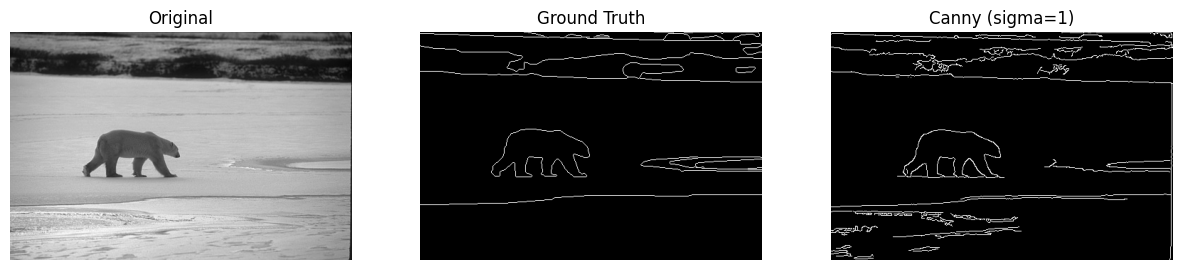

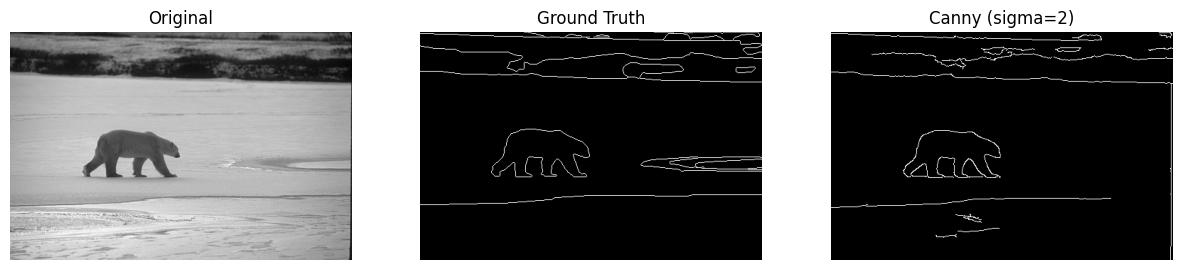

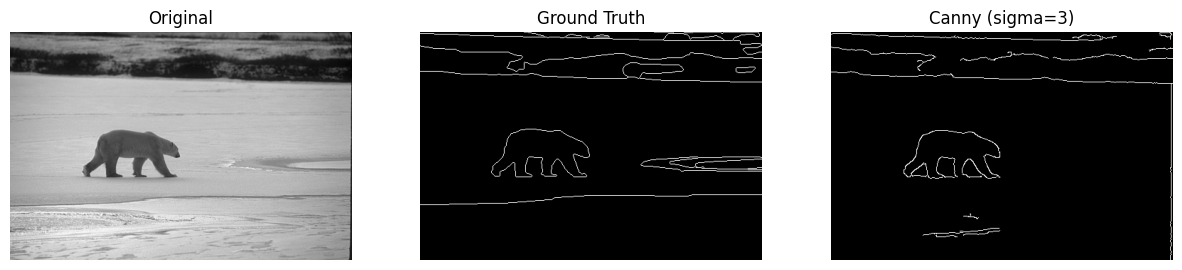

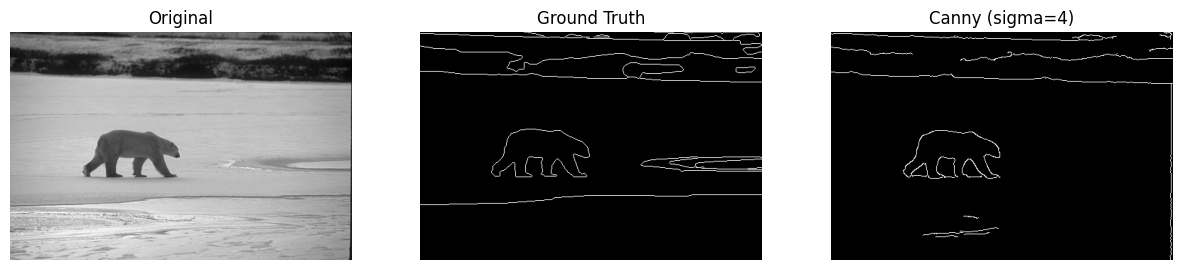

In [ ]:
# This cell implements Canny edge detection using different Gaussian blur sigma values.
img_path = '/content/BSDS500/BSDS500/images/test/100007.jpg'
gt_path  = '/content/BSDS500/BSDS500/BSDS500_first_annotation_04/test/100007.png'

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
gt  = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

sigma_values = [1, 2, 3, 4]
edges_results = []

for sigma in sigma_values:
    blurred = cv2.GaussianBlur(img, (5, 5), sigma)
    edges = cv2.Canny(blurred, 50, 150)
    edges_results.append(edges)
    plot_images([img, gt, edges], [f'Original', 'Ground Truth', f'Canny (sigma={sigma})'])


# Simple 3-layer CNN

In [ ]:
# Define the simple 3-layer CNN. The hidden layers use ReLU, kernel size=3, padding=1.
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.ReLU()
        )
        self.out = nn.Conv2d(16, 1, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.out(x)
        # Sigmoid activation to produce edge probability in [0, 1]
        x = torch.sigmoid(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_cnn = SimpleCNN().to(device)


In [ ]:
# The class-balanced loss adjusts for the imbalance between edge and non-edge pixels.
def class_balanced_loss(output, target, epsilon=1e-6):
    target = target.float()
    num_pos = torch.sum(target)
    num_neg = torch.sum(1 - target)
    total = num_pos + num_neg
    # Weights inverse to frequency; avoids division by zero thanks to epsilon.
    weight_pos = total / (num_pos + epsilon)
    weight_neg = total / (num_neg + epsilon)
    loss = - (weight_pos * target * torch.log(output + epsilon) +
              weight_neg * (1 - target) * torch.log(1 - output + epsilon))
    return loss.mean()

optimizer_cnn = optim.Adam(model_cnn.parameters(), lr=1e-4)
num_epochs_cnn = 100

train_losses_cnn = []
val_losses_cnn   = []

# Training CNN

Epoch [10/100], Train Loss: 1.2778, Val Loss: 1.2732
Epoch [20/100], Train Loss: 1.1831, Val Loss: 1.1940
Epoch [30/100], Train Loss: 1.1516, Val Loss: 1.1679
Epoch [40/100], Train Loss: 1.1392, Val Loss: 1.1541
Epoch [50/100], Train Loss: 1.1280, Val Loss: 1.1469
Epoch [60/100], Train Loss: 1.1230, Val Loss: 1.1414
Epoch [70/100], Train Loss: 1.1182, Val Loss: 1.1367
Epoch [80/100], Train Loss: 1.1121, Val Loss: 1.1333
Epoch [90/100], Train Loss: 1.1116, Val Loss: 1.1283
Epoch [100/100], Train Loss: 1.1014, Val Loss: 1.1230


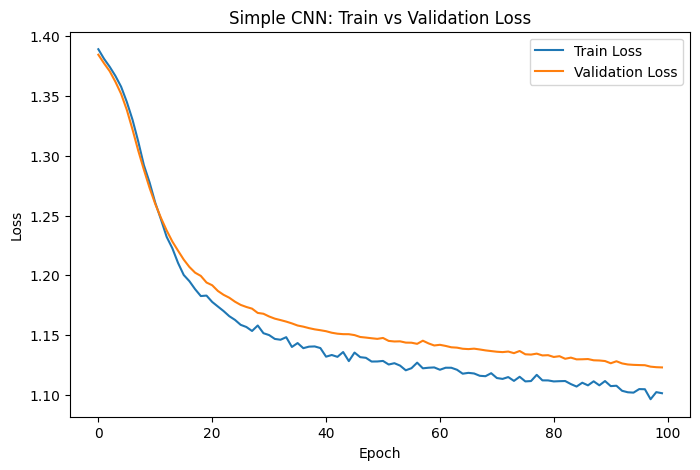

In [ ]:
# Task 2 – Define Class-Balanced Loss Function and Train Simple CNN


for epoch in range(num_epochs_cnn):
    model_cnn.train()
    running_loss = 0.0
    for imgs, edges in train_loader:
        imgs = imgs.to(device)
        edges = edges.to(device)
        optimizer_cnn.zero_grad()
        outputs = model_cnn(imgs)
        loss = class_balanced_loss(outputs, edges)
        loss.backward()
        optimizer_cnn.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses_cnn.append(train_loss)

    # Validation loss
    model_cnn.eval()
    val_loss = 0.0
    with torch.no_grad():
        for imgs, edges in val_loader:
            imgs = imgs.to(device)
            edges = edges.to(device)
            outputs = model_cnn(imgs)
            loss = class_balanced_loss(outputs, edges)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    val_losses_cnn.append(val_loss)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs_cnn}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

# Plotting training and validation loss curves for the CNN
plt.figure(figsize=(8,5))
plt.plot(train_losses_cnn, label='Train Loss')
plt.plot(val_losses_cnn, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Simple CNN: Train vs Validation Loss")
plt.legend()
plt.show()




## Function to display outputs with multiple threshold valus

In [ ]:


def plot_predictions_multiple_thresholds(model, test_loader, device, thresholds=[0.3, 0.4, 0.5, 0.6, 0.7]):
    """
    Visualize a test image and its associated ground truth along with predicted edge maps
    binarized at multiple threshold values. The function uses a larger figure size so that
    details in differences are more easily visible.

    Args:
        model: Trained edge detection model.
        test_loader: DataLoader for the test dataset.
        device: Device ('cuda' or 'cpu') where the model is running.
        thresholds (list of float): Threshold values for which to binarize the predictions.
    """
    model.eval()
    for i, (img, gt_edge) in enumerate(test_loader):
        if i >= 5:
            break

        img = img.to(device)
        with torch.no_grad():
            output = model(img)

        # Remove batch dimension and squeeze any singleton channel dimension.
        output = output.cpu().squeeze(0)
        if output.ndim == 3 and output.shape[0] == 1:
            output = output.squeeze(0)

        # Process the ground truth edge map.
        gt_np = gt_edge.cpu().squeeze(0)
        if gt_np.ndim == 3 and gt_np.shape[0] == 1:
            gt_np = gt_np.squeeze(0)
        gt_np = gt_np.numpy()

        # Process the original image.
        img_tensor = img.cpu().squeeze(0)
        if img_tensor.shape[0] == 3:  # color image
            img_np = img_tensor.permute(1,2,0).numpy()
            img_np = ((img_np * np.array([0.229, 0.224, 0.225])) + np.array([0.485, 0.456, 0.406]))
            img_np = np.clip(img_np, 0, 1)
        else:
            img_np = img_tensor.numpy()

        # Binarize the predicted edge map at each threshold.
        pred_list = []
        for thresh in thresholds:
            pred_bin = (output > thresh).float().numpy()
            pred_list.append(pred_bin)


        total_plots = 2 + len(thresholds)
        plt.figure(figsize=(25, 10))  # Increase figure size for clarity

        # Plot original image.
        plt.subplot(1, total_plots, 1)
        if img_np.ndim == 2:
            plt.imshow(img_np, cmap='gray')
        else:
            plt.imshow(img_np)
        plt.title("Original Image", fontsize=16)
        plt.axis("off")

        # Plot ground truth.
        plt.subplot(1, total_plots, 2)
        plt.imshow(gt_np, cmap="gray")
        plt.title("Ground Truth", fontsize=16)
        plt.axis("off")

        # Plot predicted edge maps for each threshold.
        for idx, thresh in enumerate(thresholds):
            plt.subplot(1, total_plots, 3 + idx)
            plt.imshow(pred_list[idx], cmap="gray")
            plt.title("Thresh = {}".format(thresh), fontsize=16)
            plt.axis("off")

        plt.show()



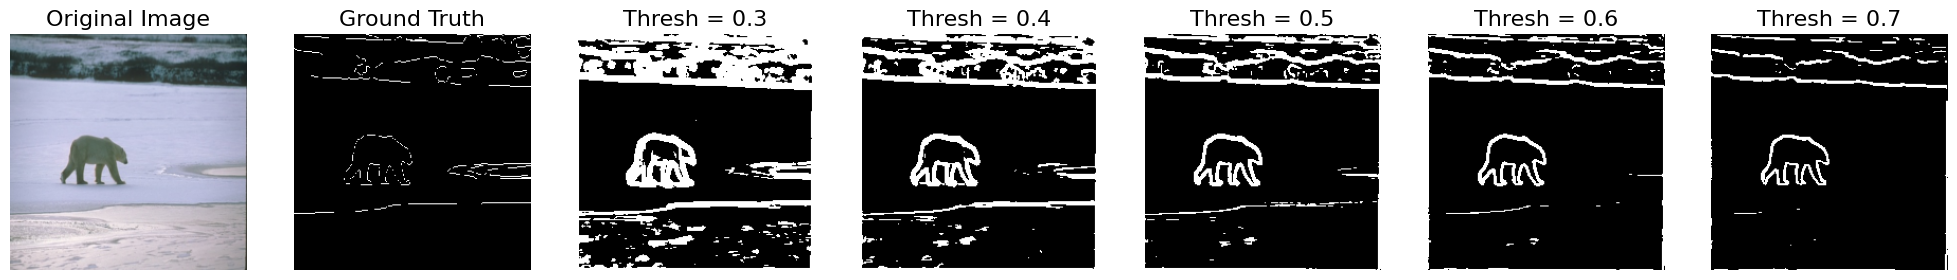

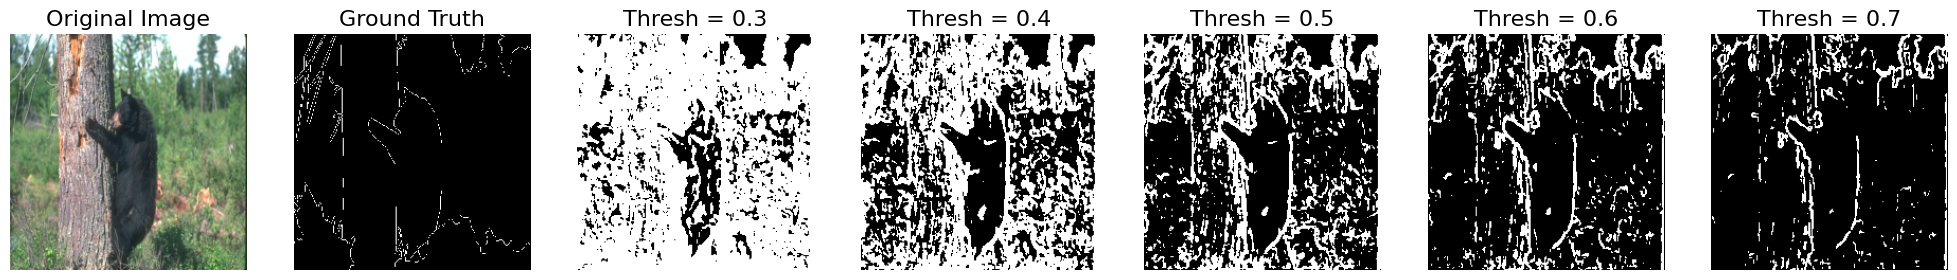

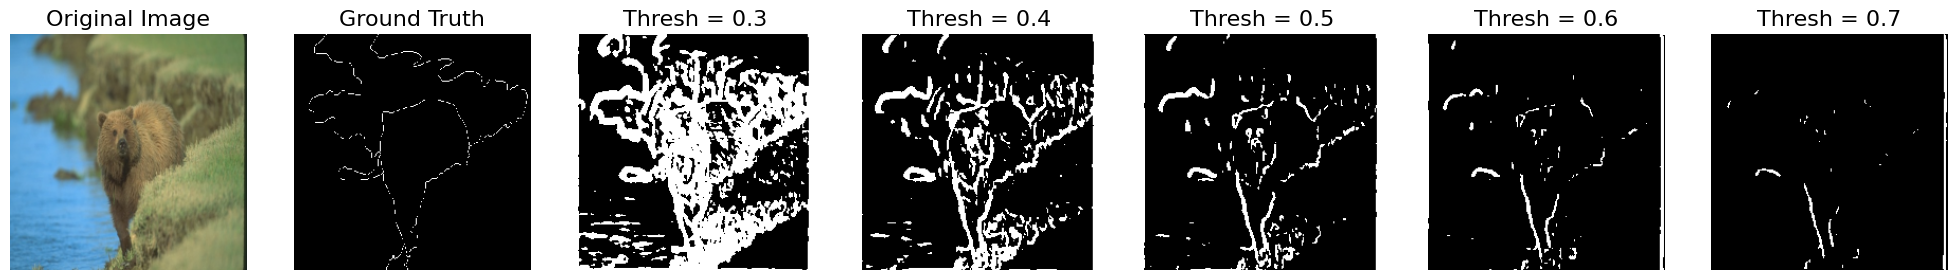

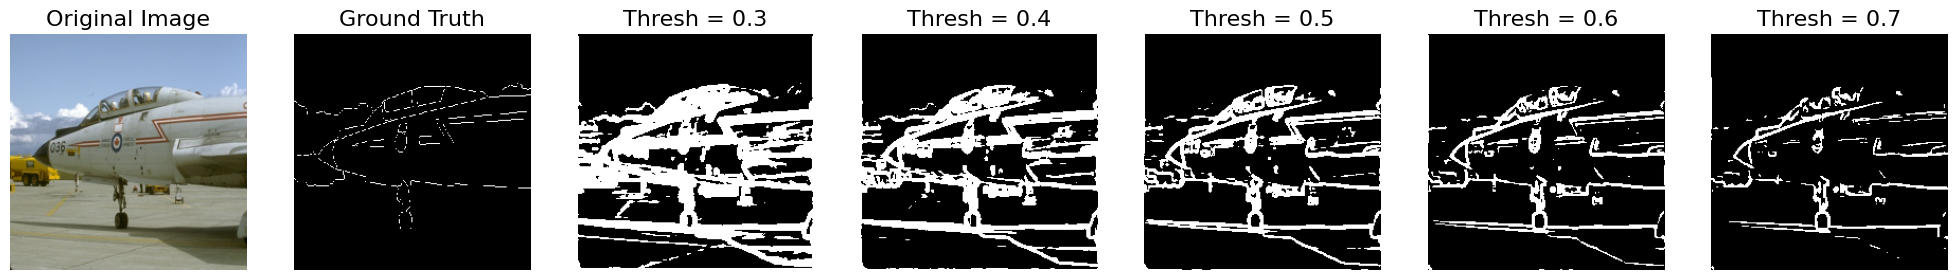

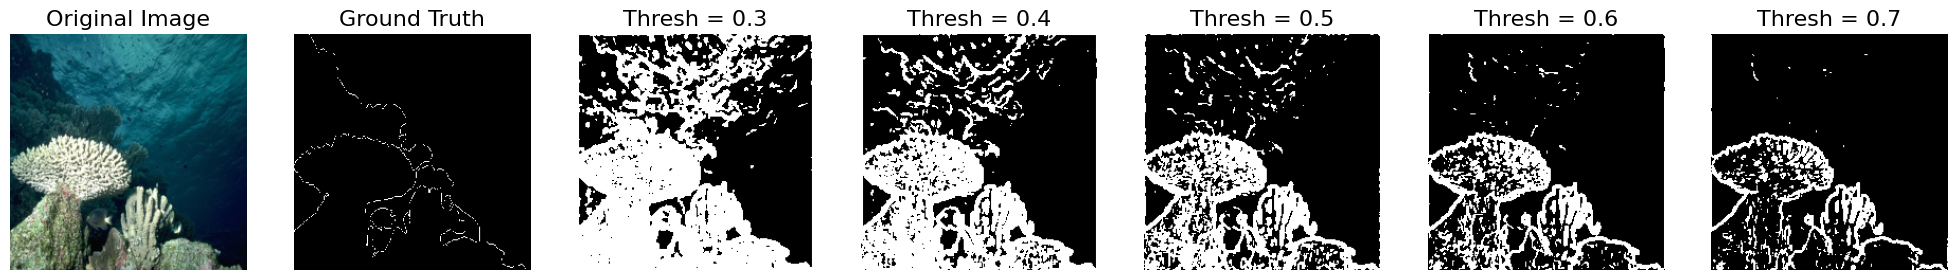

In [ ]:
# Assume model_cnn is your trained model, test_loader is your DataLoader for test samples, and device is set.
plot_predictions_multiple_thresholds(model_cnn, test_loader, device, thresholds=[0.3, 0.4, 0.5, 0.6, 0.7])

## Dataset paths and loader instantiate

In [ ]:
# Define paths (adjust as needed).
images_dir = './BSDS500/BSDS500/images/train'
ground_truths_dir = './BSDS500/BSDS500/BSDS500_first_annotation_04/train'
train_dataset = BSDSDataset(images_dir, ground_truths_dir, transform=transform_vgg)
val_dataset   = BSDSDataset('./BSDS500/BSDS500/images/val', './BSDS500/BSDS500/BSDS500_first_annotation_04/val', transform=transform_vgg)
test_dataset  = BSDSDataset('./BSDS500/BSDS500/images/test', './BSDS500/BSDS500/BSDS500_first_annotation_04/test', transform=transform_vgg)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True,collate_fn=custom_collate_fn)
val_loader   = DataLoader(val_dataset, batch_size=4, shuffle=False,collate_fn=custom_collate_fn)
test_loader  = DataLoader(test_dataset, batch_size=1, shuffle=False)


Found 198 common files.
Found 100 common files.
Found 199 common files.


# VGG16 Model

In [ ]:
#   Task 3 – VGG16-Based Model for Edge Detection with Transpose Convolution Decoder
vgg16 = models.vgg16(pretrained=True)
features = list(vgg16.features.children())[:-1]  # remove the final max-pool layer
vgg16_encoder = nn.Sequential(*features)

# Define a decoder: two ConvTranspose2d layers followed by a final Conv2d to output edge probability.
class VGG16EdgeDetector(nn.Module):
    def __init__(self):
        super(VGG16EdgeDetector, self).__init__()
        self.encoder = vgg16_encoder  # Fixed encoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 1, kernel_size=1)
        )
        # Optionally, one may add an upsampling layer if output size mismatches target size
        self.upsampler = nn.Upsample(size=(224, 224), mode='bilinear', align_corners=True)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        x = torch.sigmoid(x)
        x = self.upsampler(x)
        return x

model_vgg = VGG16EdgeDetector().to(device)


## Training VGG16

Epoch [10/100], Train Loss: 0.7590, Val Loss: 1.7794
Epoch [20/100], Train Loss: 0.5463, Val Loss: 2.7086
Epoch [30/100], Train Loss: 0.4615, Val Loss: 3.3071
Epoch [40/100], Train Loss: 0.4241, Val Loss: 3.3870
Epoch [50/100], Train Loss: 0.4155, Val Loss: 3.1759
Epoch [60/100], Train Loss: 0.4119, Val Loss: 3.3565
Epoch [70/100], Train Loss: 0.4073, Val Loss: 3.3019
Epoch [80/100], Train Loss: 0.4077, Val Loss: 3.3364
Epoch [90/100], Train Loss: 0.5190, Val Loss: 2.4273
Epoch [100/100], Train Loss: 0.4050, Val Loss: 3.2567


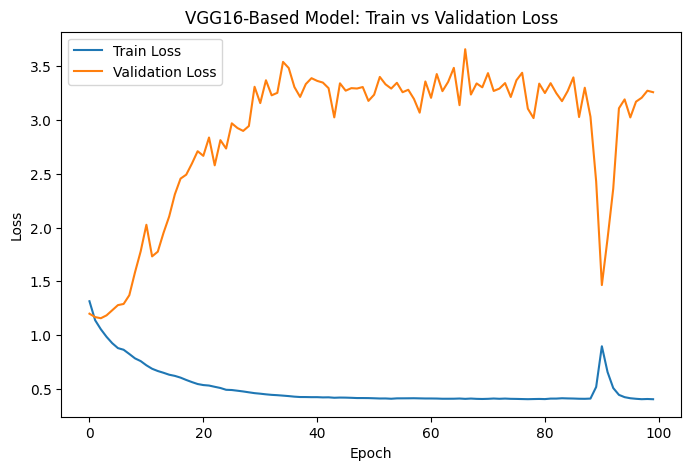

In [ ]:
# Task 3 – Train VGG16-Based Edge Detector
optimizer_vgg = optim.Adam(model_vgg.parameters(), lr=1e-4)
num_epochs_vgg = 100

train_losses_vgg = []
val_losses_vgg   = []

for epoch in range(num_epochs_vgg):
    model_vgg.train()
    running_loss = 0.0
    for imgs, edges in train_loader:
        imgs = imgs.to(device)
        edges = edges.to(device)
        optimizer_vgg.zero_grad()
        outputs = model_vgg(imgs)
        loss = class_balanced_loss(outputs, edges)
        loss.backward()
        optimizer_vgg.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses_vgg.append(train_loss)

    model_vgg.eval()
    val_loss = 0.0
    with torch.no_grad():
        for imgs, edges in val_loader:
            imgs = imgs.to(device)
            edges = edges.to(device)
            outputs = model_vgg(imgs)
            loss = class_balanced_loss(outputs, edges)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    val_losses_vgg.append(val_loss)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs_vgg}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

# Plot training and validation loss curves for the VGG16 model
plt.figure(figsize=(8,5))
plt.plot(train_losses_vgg, label='Train Loss')
plt.plot(val_losses_vgg, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("VGG16-Based Model: Train vs Validation Loss")
plt.legend()
plt.show()



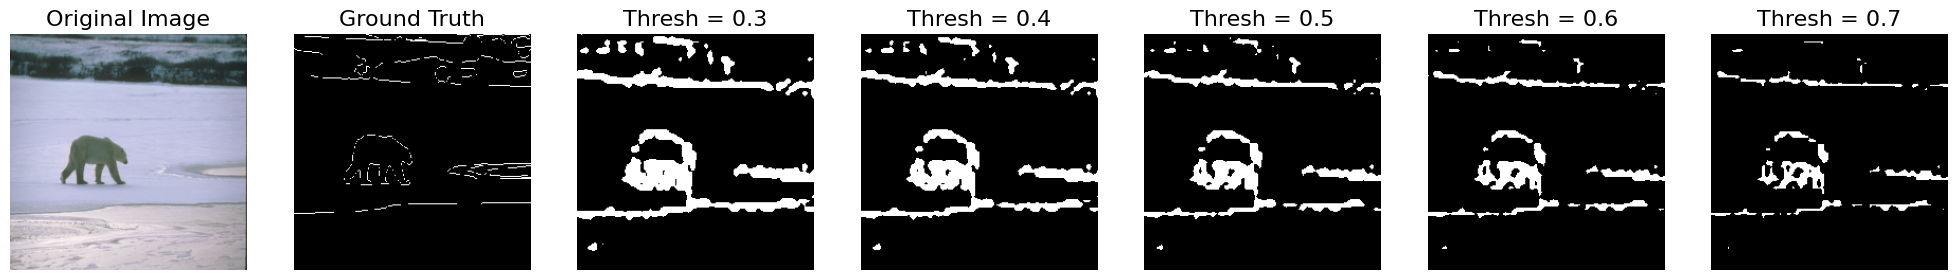

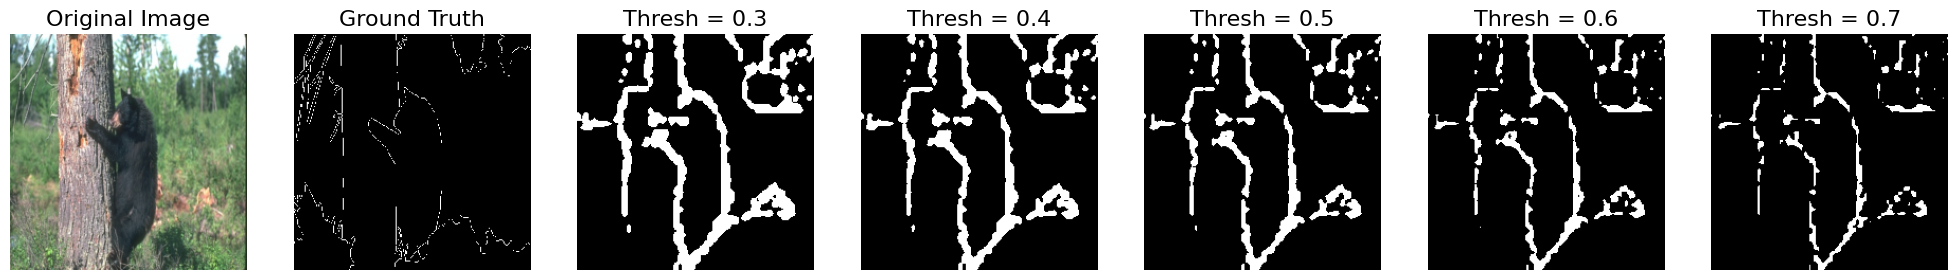

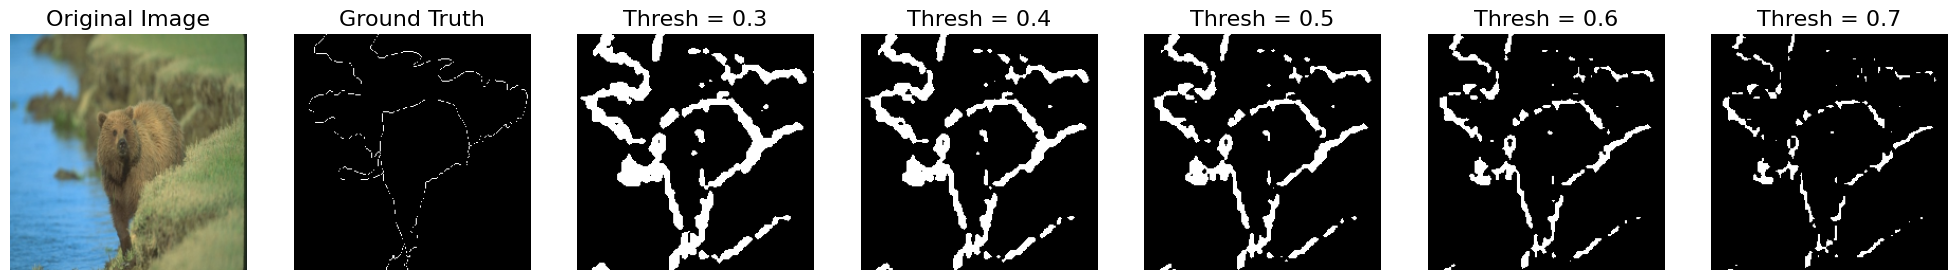

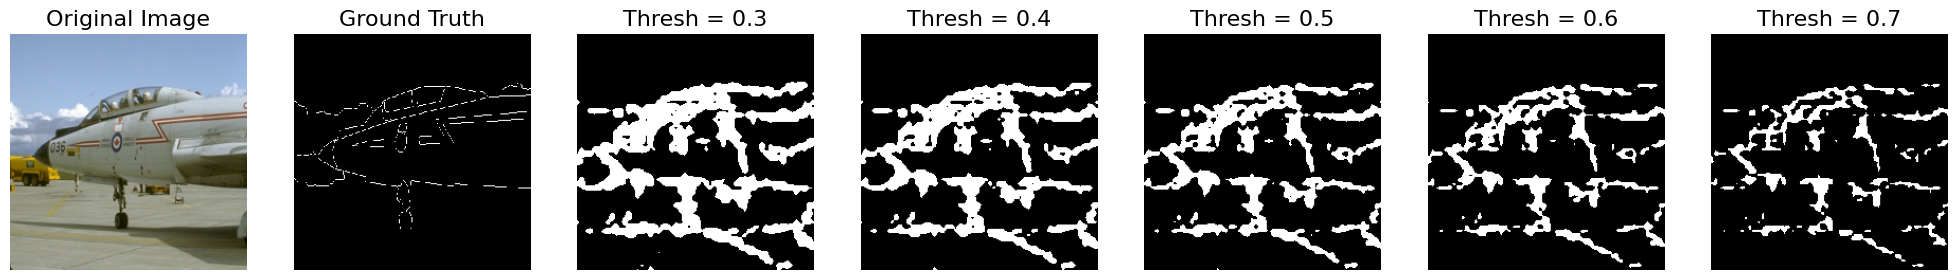

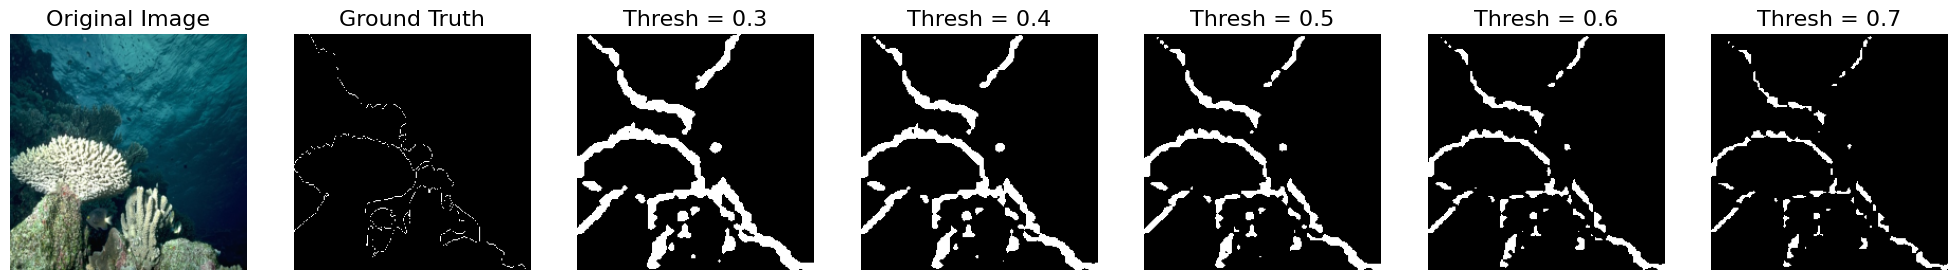

In [ ]:
# Visualize outputs on a set of test images with different threshold values
plot_predictions_multiple_thresholds(model_vgg, test_loader, device, thresholds=[0.3, 0.4, 0.5, 0.6, 0.7])

# Holistically Nested Edge Detection (HED) Model

In [ ]:
# Task 4 – Holistically Nested Edge Detection (HED) Model
class HED(nn.Module):
    def __init__(self, pretrained=True):
        super(HED, self).__init__()
        vgg16 = models.vgg16(pretrained=pretrained)
        self.layers = vgg16.features  # Use VGG16 convolutional layers

        # Define side output layers after specific conv layers (using 1x1 convolutions)
        # VGG16 architecture indices: conv1_2 (idx=3), conv2_2 (idx=8), conv3_3 (idx=15),
        # conv4_3 (idx=22), conv5_3 (idx=29)
        self.side1 = nn.Conv2d(64, 1, kernel_size=1)
        self.side2 = nn.Conv2d(128, 1, kernel_size=1)
        self.side3 = nn.Conv2d(256, 1, kernel_size=1)
        self.side4 = nn.Conv2d(512, 1, kernel_size=1)
        self.side5 = nn.Conv2d(512, 1, kernel_size=1)
        # Fusion layer: fuse concatenated side outputs with learnable weights.
        self.fuse = nn.Conv2d(5, 1, kernel_size=1)

    def forward(self, x):
        side_outputs = [None]*5
        out = x
        # Traverse through VGG layers and record outputs at designated indices
        for i, layer in enumerate(self.layers):
            out = layer(out)
            if i == 3:
                side_outputs[0] = self.side1(out)
            elif i == 8:
                side_outputs[1] = self.side2(out)
            elif i == 15:
                side_outputs[2] = self.side3(out)
            elif i == 22:
                side_outputs[3] = self.side4(out)
            elif i == 29:
                side_outputs[4] = self.side5(out)
        # Upsample side outputs to the size of input image
        upsampled = [nn.functional.interpolate(side, size=x.size()[2:], mode='bilinear', align_corners=True)
                     for side in side_outputs]
        # Fuse side outputs: concatenate along channel dimension and pass through fusion layer
        fuse_input = torch.cat(upsampled, dim=1)
        fuse_out = self.fuse(fuse_input)
        # Apply sigmoid to get probabilities
        fuse_out = torch.sigmoid(fuse_out)
        side_outs_sigmoid = [torch.sigmoid(side) for side in upsampled]
        return fuse_out, side_outs_sigmoid

model_hed = HED(pretrained=True).to(device)


# Training HED

HED Epoch [10/50], Train Loss: 0.6164, Val Loss: 1.1327
HED Epoch [20/50], Train Loss: 0.4876, Val Loss: 1.7709
HED Epoch [30/50], Train Loss: 0.4396, Val Loss: 1.8333
HED Epoch [40/50], Train Loss: 0.4066, Val Loss: 1.9794
HED Epoch [50/50], Train Loss: 0.3893, Val Loss: 2.3586


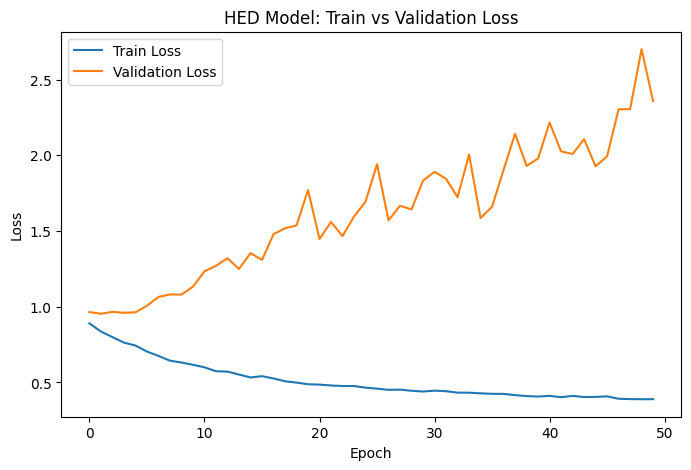

In [ ]:
# Task 4 – Train HED Model for 50 Epochs and Visualize Side Outputs
optimizer_hed = optim.Adam(model_hed.parameters(), lr=1e-4)
num_epochs_hed = 50

train_losses_hed = []
val_losses_hed   = []

for epoch in range(num_epochs_hed):
    model_hed.train()
    running_loss = 0.0
    for imgs, edges in train_loader:
        imgs = imgs.to(device)
        edges = edges.to(device)
        optimizer_hed.zero_grad()
        fuse_out, _ = model_hed(imgs)
        loss = class_balanced_loss(fuse_out, edges)
        loss.backward()
        optimizer_hed.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses_hed.append(train_loss)

    model_hed.eval()
    val_loss = 0.0
    with torch.no_grad():
        for imgs, edges in val_loader:
            imgs = imgs.to(device)
            edges = edges.to(device)
            fuse_out, _ = model_hed(imgs)
            loss = class_balanced_loss(fuse_out, edges)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    val_losses_hed.append(val_loss)

    if (epoch+1) % 10 == 0:
        print(f'HED Epoch [{epoch+1}/{num_epochs_hed}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

# Plot training and validation loss curves for HED
plt.figure(figsize=(8,5))
plt.plot(train_losses_hed, label='Train Loss')
plt.plot(val_losses_hed, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("HED Model: Train vs Validation Loss")
plt.legend()
plt.show()





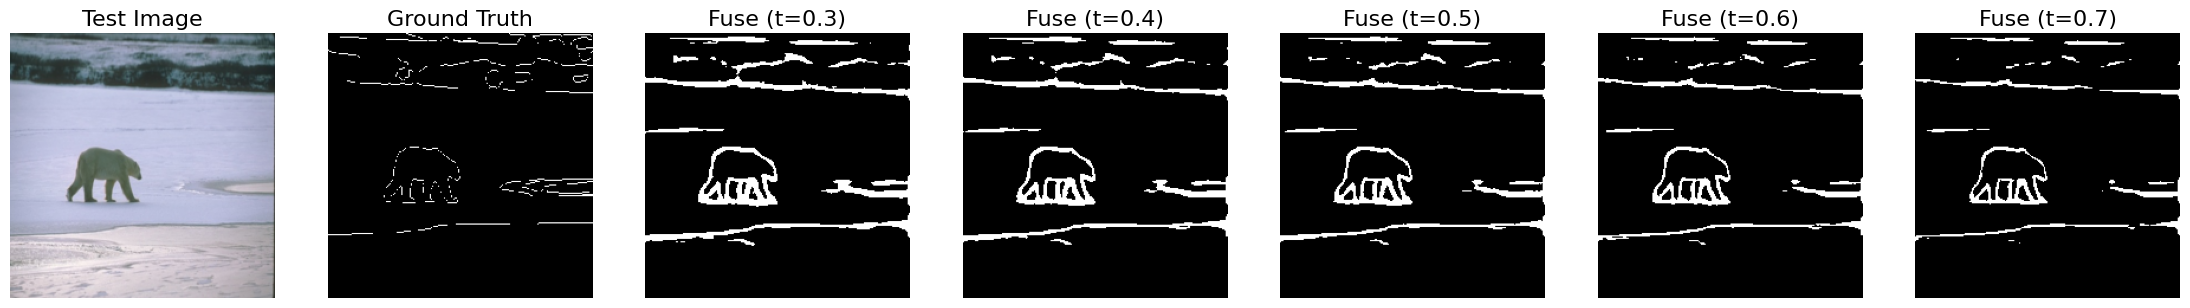

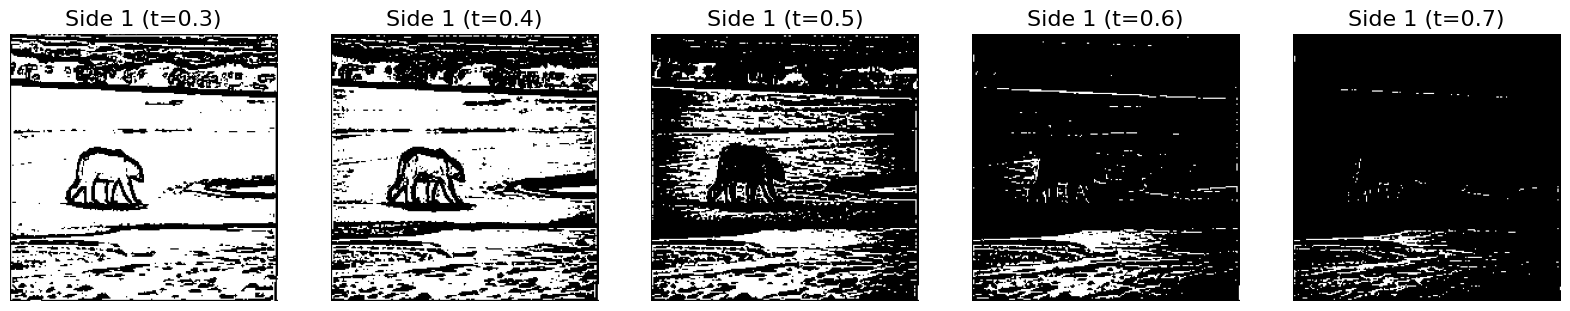

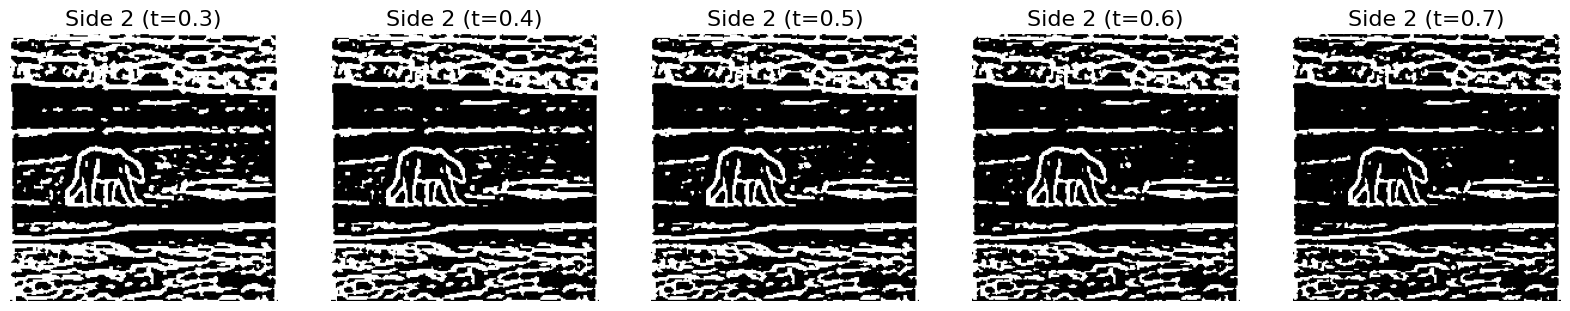

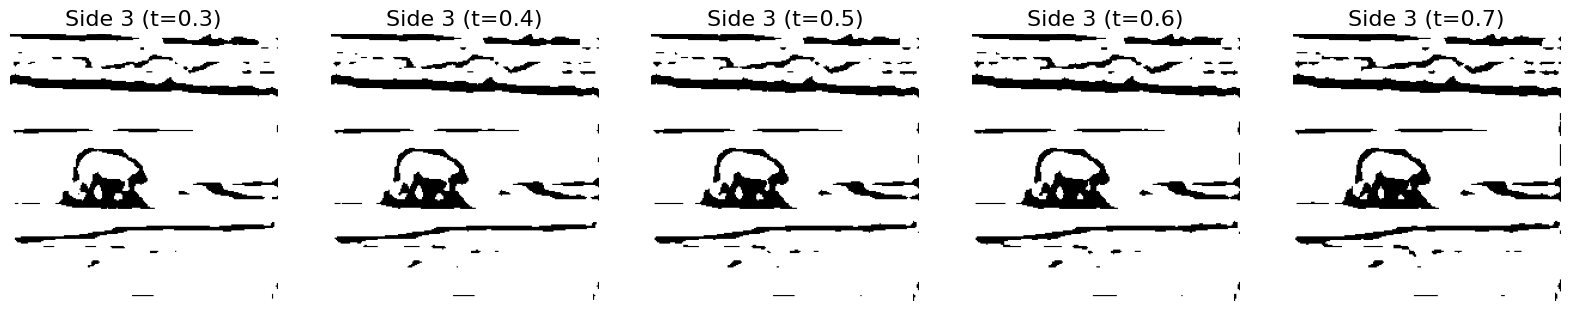

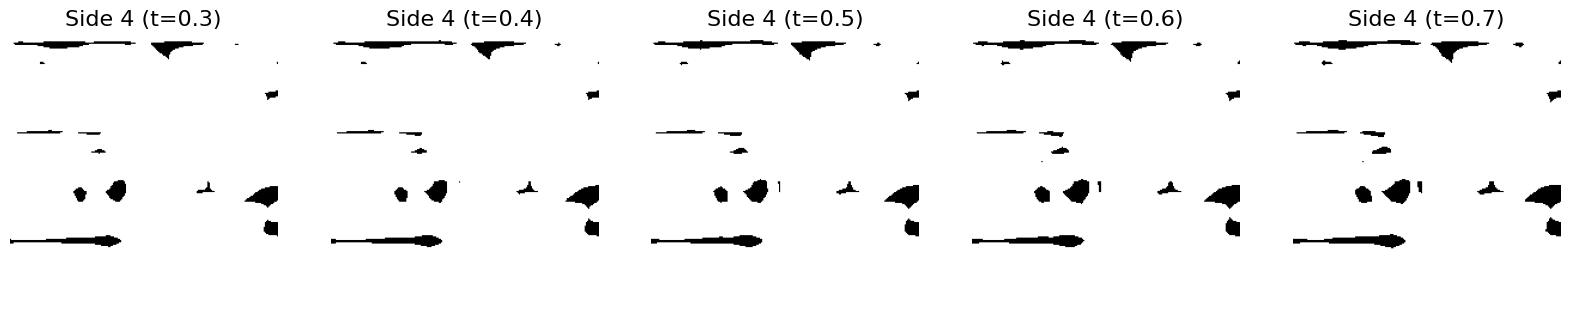

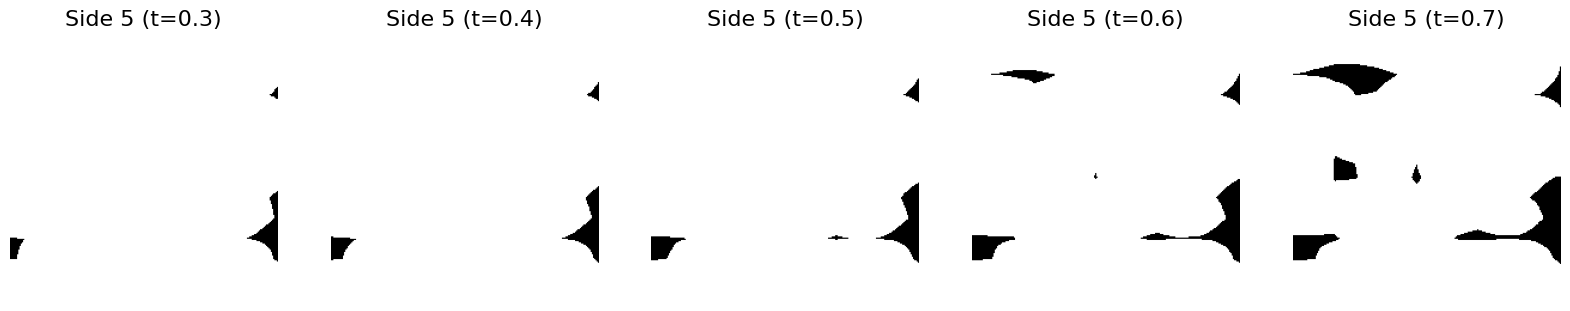

In [ ]:

# Helper function to display a list of images in one figure.
def plot_images(images, titles, cmap=None, figsize=(15,5)):
    n = len(images)
    plt.figure(figsize=figsize)
    for i in range(n):
        plt.subplot(1, n, i+1)
        if images[i].ndim == 2 and cmap is not None:  # Grayscale image
            plt.imshow(images[i], cmap=cmap)
        else:
            plt.imshow(images[i])
        plt.title(titles[i], fontsize=14)
        plt.axis("off")
    plt.show()

# Visualization code for HED outputs with multiple threshold values.
model_hed.eval()
# Process a single test sample.
for i, (img, gt_edge) in enumerate(test_loader):
    if i >= 1:
        break
    img = img.to(device)
    with torch.no_grad():
        fuse_out, side_outs = model_hed(img)

    # Define a list of threshold values.
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

    # Process fused output.
    # fuse_out is expected to be of shape [1, 1, H, W]. Remove the batch and channel dims.
    fuse_processed = fuse_out.cpu().squeeze(0).squeeze(0)

    # Compute binarized outputs for each threshold.
    fuse_bins = []
    for t in thresholds:
        fuse_bin = (fuse_out > t).float().cpu().squeeze(0).squeeze(0).numpy()
        fuse_bins.append(fuse_bin)

    # Process the ground truth edge map.
    gt_np = gt_edge.cpu().squeeze(0)
    if gt_np.ndim == 3 and gt_np.shape[0] == 1:
        gt_np = gt_np.squeeze(0)
    gt_np = gt_np.numpy()

    # Process the original image.
    # Undo normalization (assuming your transform normalized using the ImageNet statistics).
    img_np = img.cpu().squeeze(0).permute(1, 2, 0).numpy()
    img_np = ((img_np * np.array([0.229, 0.224, 0.225])) + np.array([0.485, 0.456, 0.406]))
    img_np = np.clip(img_np, 0, 1)

    # Plot fused output: show original image, ground truth, and thresholded fused outputs.
    num_cols = 2 + len(thresholds)  # Original, Ground truth, plus one for each threshold.
    plt.figure(figsize=(4*num_cols, 4))
    plt.subplot(1, num_cols, 1)
    plt.imshow(img_np)
    plt.title("Test Image", fontsize=16)
    plt.axis("off")

    plt.subplot(1, num_cols, 2)
    plt.imshow(gt_np, cmap='gray')
    plt.title("Ground Truth", fontsize=16)
    plt.axis("off")
    for j, t in enumerate(thresholds):
        plt.subplot(1, num_cols, 3+j)
        plt.imshow(fuse_bins[j], cmap='gray')
        plt.title("Fuse (t={})".format(t), fontsize=16)
        plt.axis("off")
    plt.show()

    # Now, for each side output, plot the predictions at multiple thresholds.
    for side_idx, side in enumerate(side_outs):
        # side is expected to be [1, 1, H, W]. Squeeze dims.
        side_processed = side.cpu().squeeze(0).squeeze(0)
        side_bins = []
        for t in thresholds:
            side_bin = (side > t).float().cpu().squeeze(0).squeeze(0).numpy()
            side_bins.append(side_bin)
        # Plot all thresholded outputs for the current side output.
        plt.figure(figsize=(4*len(thresholds), 4))
        for k, t in enumerate(thresholds):
            plt.subplot(1, len(thresholds), k+1)
            plt.imshow(side_bins[k], cmap='gray')
            plt.title("Side {} (t={})".format(side_idx+1, t), fontsize=16)
            plt.axis("off")
        plt.show()

    break   # Process only one test image for visualization.
